In [1]:
import sys
import os
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import torchvision.transforms as transforms
import json

current_dir = os.getcwd()
src_dir = os.path.join(current_dir, '..', 'src')

if src_dir not in sys.path:
    sys.path.append(src_dir)

from enums import DataSplit
from tumor_dataset import TumorSemanticSegmentationDataset

In [2]:
DATASETS_ROOT = os.path.join(current_dir, '..', 'datasets')
BATCH_SIZE = 4
dataset = TumorSemanticSegmentationDataset(root_dir=DATASETS_ROOT, split=DataSplit.TRAIN, transform=transforms.ToTensor())
data_loader = DataLoader(dataset, batch_size=BATCH_SIZE, shuffle=True, num_workers=0)

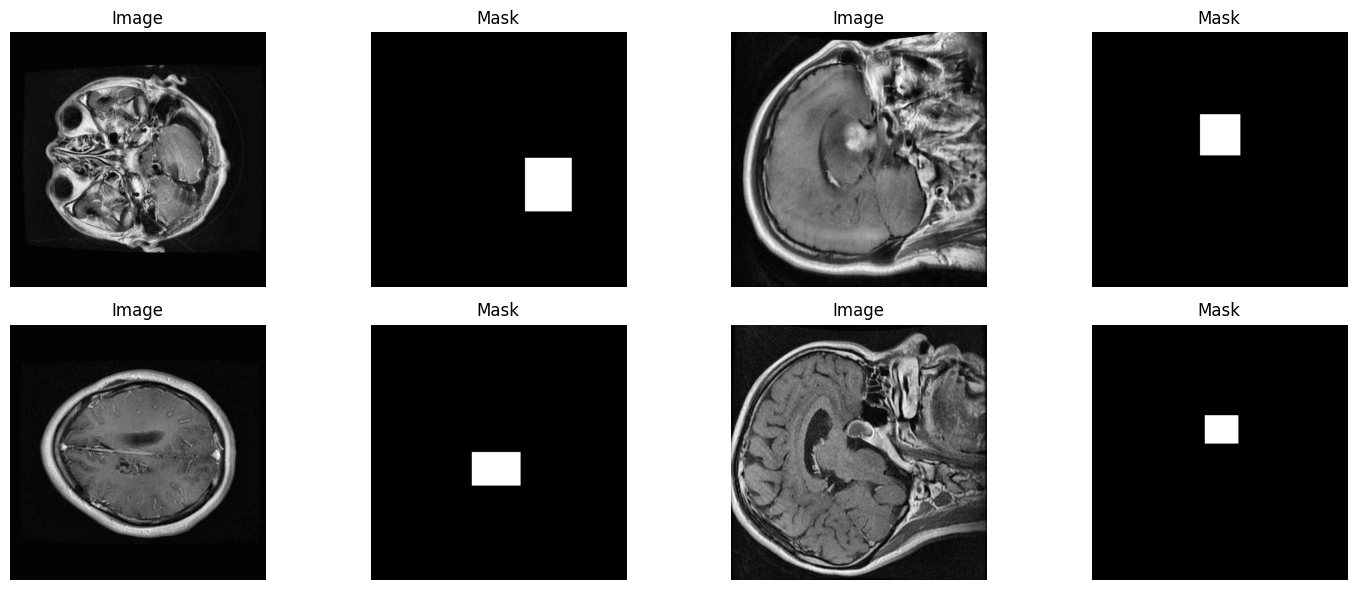

In [3]:
def show_images_with_masks(images, masks, nmax=32):
    # Calculate the number of rows needed, considering each image-mask pair as a unit per row.
    # Since we display images and masks side by side, we effectively need half the number of rows
    # compared to the original function, but each row will contain an image and its mask.
    n_rows = (min(len(images), nmax) + 1) // 2  # Adjust for maximum display limit and ensure rounding up
    fig, axs = plt.subplots(n_rows, 4, figsize=(15, n_rows * 3))  # Adjust figsize as needed
    axs = axs.flatten()

    for idx, (image, mask) in enumerate(zip(images, masks)):
        if idx >= nmax:  # Stop if we reach the maximum number of images to display
            break
        image_ax = axs[idx*2]  # Even indices for images
        mask_ax = axs[idx*2 + 1]  # Odd indices for masks

        # Assuming images and masks are Tensors of shape [C, H, W]
        image_ax.imshow(image.permute(1, 2, 0).numpy())
        image_ax.set_title("Image")
        image_ax.axis('off')

        # Assuming masks are single-channel Tensors of shape [1, H, W], convert them for display
        mask_ax.imshow(mask.squeeze().numpy(), cmap='gray')
        mask_ax.set_title("Mask")
        mask_ax.axis('off')

    # Hide any remaining unused subplots
    for ax in axs[2*len(images):]:
        ax.axis('off')

    plt.tight_layout()
    plt.show()

images, masks = next(iter(data_loader))
show_images_with_masks(images, masks)
